# Predictive Ordering: Preprocess Data

---
This notebook contains the code to preprocess the monthly historical order data that was created in PredictiveOrdering-1Generate.ipynb. The notebook uses the following data points to compute the demand which is subsequently fed into our machine learning models:
* Historical order quantity
* Out of stock information
* Product expiration
* Remaining inventory
---

## Reading the Data

Importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import math

Reading the csv file from Google Drive

In [ ]:
drive.mount("/content/gdrive")

df = pd.read_csv("gdrive/My Drive/Orders.csv")

Mounted at /content/gdrive


View the dataframe

In [ ]:
df.head()

,Unnamed: 0,HistoricalOrder1,OutOfStock1,ProductsExpired1,RemainingInventory1,HistoricalOrder2,OutOfStock2,ProductsExpired2,RemainingInventory2,HistoricalOrder3,OutOfStock3,ProductsExpired3,RemainingInventory3,HistoricalOrder4,OutOfStock4,ProductsExpired4,RemainingInventory4,HistoricalOrder5,OutOfStock5,ProductsExpired5,RemainingInventory5,HistoricalOrder6,OutOfStock6,ProductsExpired6,RemainingInventory6
0,0,38,False,1,4,15,False,6,3,15,False,6,7,39,False,1,0,38,False,3,5,13,False,0,0
1,1,37,False,9,3,15,False,9,5,15,False,8,9,39,True,2,0,37,False,0,5,13,False,0,0
2,2,37,False,6,4,15,False,9,1,15,False,1,4,38,False,0,0,37,False,0,4,12,False,0,9
3,3,69,False,8,2,15,False,2,1,15,False,3,5,37,True,0,0,36,False,0,5,12,False,6,5
4,4,64,False,9,0,15,False,1,3,15,False,8,0,39,False,7,0,35,False,0,0,11,False,3,0


Rename "Unnamed 0" to "Period"

In [ ]:
df.rename(columns={"Unnamed: 0": "Period"}, inplace=True)

## Preprocessing

Whenever the a product is out of stock in a certain week, it indicates that the previous order quantity was insufficient and therefore failed to satisfy future demand. We use the out of stock flag to pad the previous historical order quantity by a factor

In [ ]:
paddingFactor = 10

for i in range(1, len(df)):
  if df.loc[i, "OutOfStock1"] == True:
    df.loc[i-1, "HistoricalOrder1"] = math.ceil(df.loc[i-1, "HistoricalOrder1"] * (1 + (paddingFactor / 100)))

View the dataframe

In [ ]:
df.head()

,Period,HistoricalOrder1,OutOfStock1,ProductsExpired1,RemainingInventory1,HistoricalOrder2,OutOfStock2,ProductsExpired2,RemainingInventory2,HistoricalOrder3,OutOfStock3,ProductsExpired3,RemainingInventory3,HistoricalOrder4,OutOfStock4,ProductsExpired4,RemainingInventory4,HistoricalOrder5,OutOfStock5,ProductsExpired5,RemainingInventory5,HistoricalOrder6,OutOfStock6,ProductsExpired6,RemainingInventory6
0,0,38,False,1,4,15,False,6,3,15,False,6,7,39,False,1,0,38,False,3,5,13,False,0,0
1,1,37,False,9,3,15,False,9,5,15,False,8,9,39,True,2,0,37,False,0,5,13,False,0,0
2,2,37,False,6,4,15,False,9,1,15,False,1,4,38,False,0,0,37,False,0,4,12,False,0,9
3,3,69,False,8,2,15,False,2,1,15,False,3,5,37,True,0,0,36,False,0,5,12,False,6,5
4,4,64,False,9,0,15,False,1,3,15,False,8,0,39,False,7,0,35,False,0,0,11,False,3,0


Combine the Historical orders, Products Expired and Remaining Inventory using the formula below: 

**Sales = Orders - (Products Expired + Remaining Inventory)**

In [ ]:
df["Sales1"] = df.HistoricalOrder1 - (df.ProductsExpired1 + df.RemainingInventory1)
df["Sales2"] = df.HistoricalOrder2 - (df.ProductsExpired2 + df.RemainingInventory2)
df["Sales3"] = df.HistoricalOrder3 - (df.ProductsExpired3 + df.RemainingInventory3)
df["Sales4"] = df.HistoricalOrder4 - (df.ProductsExpired4 + df.RemainingInventory4)
df["Sales5"] = df.HistoricalOrder5 - (df.ProductsExpired5 + df.RemainingInventory5)
df["Sales6"] = df.HistoricalOrder6 - (df.ProductsExpired6 + df.RemainingInventory6)

Dropping the Historical Order, Out of Stock, Product Expired and Remaining Inventory columns as they are no longer required

In [ ]:
df.drop(columns=["HistoricalOrder1", "HistoricalOrder2", "HistoricalOrder3", "HistoricalOrder4", "HistoricalOrder5", "HistoricalOrder6"], inplace=True)
df.drop(columns=["OutOfStock1", "OutOfStock2", "OutOfStock3", "OutOfStock4", "OutOfStock5", "OutOfStock6"], inplace=True)
df.drop(columns=["ProductsExpired1", "ProductsExpired2", "ProductsExpired3", "ProductsExpired4", "ProductsExpired5", "ProductsExpired6"], inplace=True)
df.drop(columns=["RemainingInventory1", "RemainingInventory2", "RemainingInventory3", "RemainingInventory4", "RemainingInventory5", "RemainingInventory6"], inplace=True)

Display the dataframe

In [ ]:
df.head()

,Period,Sales1,Sales2,Sales3,Sales4,Sales5,Sales6
0,0,33,6,2,38,30,13
1,1,25,1,-2,37,32,13
2,2,27,5,10,38,33,3
3,3,59,12,7,37,31,1
4,4,55,11,7,32,35,8


*Sales* cannot be negative, so we floor the values to 0

In [ ]:
df["Sales1"] = df["Sales1"].apply(lambda x: 0 if x < 0 else x)
df["Sales2"] = df["Sales2"].apply(lambda x: 0 if x < 0 else x)
df["Sales3"] = df["Sales3"].apply(lambda x: 0 if x < 0 else x)
df["Sales4"] = df["Sales4"].apply(lambda x: 0 if x < 0 else x)
df["Sales5"] = df["Sales5"].apply(lambda x: 0 if x < 0 else x)
df["Sales6"] = df["Sales6"].apply(lambda x: 0 if x < 0 else x)

Display the dataframe

In [ ]:
df.head()

,Period,Sales1,Sales2,Sales3,Sales4,Sales5,Sales6
0,0,33,6,2,38,30,13
1,1,25,1,0,37,32,13
2,2,27,5,10,38,33,3
3,3,59,12,7,37,31,1
4,4,55,11,7,32,35,8


## Visualize the Preprocessed Data

Defining a function to visualize the data

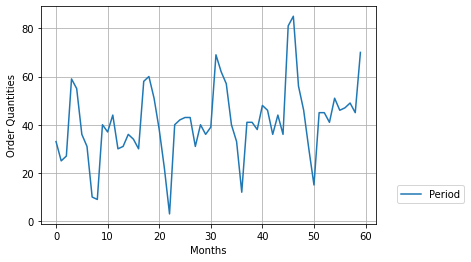

In [ ]:
shortProductNames = df.columns

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Months")
    plt.ylabel("Order Quantities")
    plt.legend(shortProductNames, loc="upper left", bbox_to_anchor=(1.05, 0.0, 0.3, 0.2))
    plt.grid(True)

plot_series(np.arange(60, dtype="int"), df["Sales1"])

## Exporting the Preprocessed Data

In [ ]:
drive.mount("drive")

df.to_csv("PreprocessedOrders.csv")
!cp PreprocessedOrders.csv "drive/My Drive/"

Mounted at drive
